In [34]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.rcParams['font.family'] = 'Arial'
%pwd

'/home/chn/repo/SiC-2nd-paper'

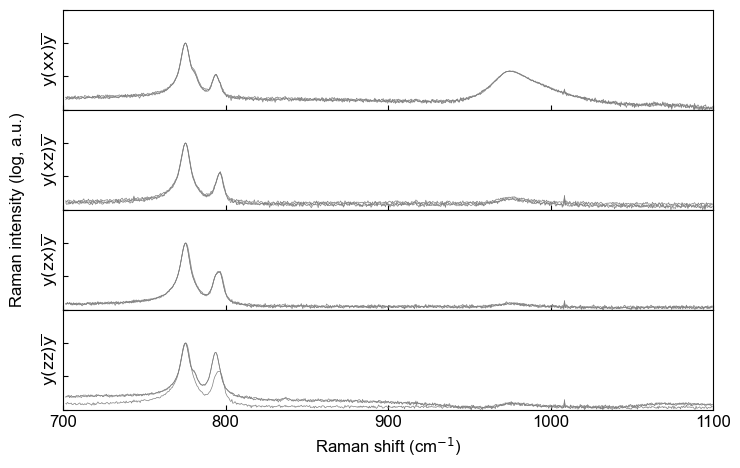

In [35]:
raman = [ "yxxy", "yxzy", "yzxy", "yzzy" ]
title = [ "$\\mathrm{y(xx)\\overline{y}}$", "$\\mathrm{y(xz)\\overline{y}}$", "$\\mathrm{y(zx)\\overline{y}}$", "$\\mathrm{y(zz)\\overline{y}}$" ]
fig, axes = plt.subplots(4, figsize=(6.5, 4))

for i in range(0, 4):
  for j in [ 1, 2, 3 ]:
    file = open(f"../stuff/42/20250524/2/{j}/{raman[i]}.txt", 'r', encoding='utf-8', errors='ignore')
    data = np.loadtxt(file, comments='#')
    # 平移并缩放y，使得最小值为 10，最大值为 1000
    data[:,1] = 10 + (data[:,1] - data[:,1].min()) / (data[:,1].max() - data[:,1].min()) * 990
    axes[i].plot(data[:,0], np.log10(data[:,1]), color="gray", linewidth=0.5)
  axes[i].set(xlim=[700, 1100], ylim=[1, 4])
  fig.text(-0.02, 0.875 - i * 0.25, title[i], va='center', ha='center', rotation='vertical', fontsize=12, fontname='Arial')
  axes[i].tick_params(direction='in')
  axes[i].set_xticks(range(700, 1101, 100))
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
fig.text(-0.07, 0.5, "Raman intensity (log, a.u.)", va='center', ha='center', rotation='vertical', fontsize=12, fontname='Arial')
axes[3].set_xticklabels(range(700, 1101, 100), fontsize=12, fontname='Arial')
axes[3].set_xlabel("Raman shift (cm$^{-1}$)", fontsize=12, fontname='Arial')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
fig.savefig(f'画图/过焦/拉曼.svg', format='svg', transparent=True)